In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm


In [2]:
data = pd.read_csv('/Users/haodong/Desktop/df_model.csv')

In [3]:
data.head()

,Unnamed: 0,index,address,name,title,content,date,spam,combine,spam_w
0,4,4,WSJ+@email.dowjones.com,WSJ+,"Shangjun, Choose Your Complimentary Page-Turne...",Add a new title to your spring reading list w...,29-Mar,0,"Shangjun, Choose Your Complimentary Page-Turne...",ham
1,7,7,sm8272@bncollege.com,Stevens Institute o.,‚ÄºÔ∏è Don't Miss This - All Tees on Sale ‚ÄºÔ∏è,Act Fast: The BOGO Ends Soon. Act Fast: The B...,29-Mar,0,‚ÄºÔ∏è Don't Miss This - All Tees on Sale ‚ÄºÔ...,ham
2,10,10,access@interactive.wsj.com,"Matt Murray, WSJ",The 10-Point: A Guide to the Day's Top News,Wells Fargo s CEO exits Lyft set to debut 4% ...,29-Mar,0,The 10-Point: A Guide to the Day's Top News W...,ham
3,20,22,no-reply@e.udemymail.com,Udemy Instructor: R.,Survival Analysis in R - Brand NEW Course is N...,"New Promotional Announcement Hi Shangjun, an ...",27-Mar,0,Survival Analysis in R - Brand NEW Course is N...,ham
4,23,25,graduatelife@stevens.edu,Graduate Life,Graduate Student Life Newsletter,"Stay Up to Date! Issue 56 March 27, 2019 Grad...",27-Mar,0,Graduate Student Life Newsletter Stay Up to D...,ham


In [4]:
title = data.iloc[:, 2]
content = data.iloc[:, 3]
title = list(title)
content = list(content)


In [16]:
conbine = []
for i in range(0, len(title)):
    s = title[i] + ' ' + content[i]
    conbine.append(s)
# print(conbine)

["SIR II Procedures and Deadline : Ling Xinyue : 2017 9 25 15:55 : Student Group : : Alpha Club : Alpha Alpha Club's the Final Interview Result : Ling Xinyue : 2017 9 20 18:28 : Student Group : Alpha Club : Alpha Alpha Club's the Final Interview Result Dear all applicants, Above of all, thank you for your continues understanding and support recently. We are very glad to inform that the final interview result has been completed successfully. You can check the result by the attached file. Names on the list are new members in Alpha club who do well in every rounds interview and fortunately can be our companies from now. Congratulations to 35 lucky gays! For all new members, you should attend the first meeting in next Tuesday at 7:30pm. And as for the specific classroom, we will inform later.For all new members, you should join the QQ group 589382773 For some applicants who are not on the list, we really appreciate all your efforts and enthusiasm that you put into our recruitment. Believe 

In [17]:
for i in range(0, len(data)):
    data['conbine'] = conbine
data

,address,name,title,content,date,spam,conbine
0,news@kean.edu,OAA,SIR II Procedures and Deadline,: Ling Xinyue : 2017 9 25 15:55 : Student Grou...,12/17/18,1,SIR II Procedures and Deadline : Ling Xinyue :...
1,info@n.skinstore.com,SkinStore,[Site-Wide] 25% Off + Three Free Gifts,"$1,000 OFF massage chairs, up to $1,600 OFF LG...",5/18/12,0,"[Site-Wide] 25% Off + Three Free Gifts $1,000 ..."
2,Bloomingdales@e.bloomingdales.com,Beauty at Bloomingd.,Choose a Space NK sample with any $25 beauty p...,"$1,500 OFF on spas, up to $1,500 OFF on patio ...",12/18/12,0,Choose a Space NK sample with any $25 beauty p...
3,mac_cosmetics@e.maccosmetics.com,MAC Cosmetics,Mini Glitter & Pigment Kits _ Swipe on Some Sp...,"$2,500 OFF Aquaterra Spas Ventura, $1,000 OFF ...",10/29/18,0,Mini Glitter & Pigment Kits _ Swipe on Some Sp...
4,shop@focuscamera.com,Focus Camera,Don__ Fall Behind On Holiday Shopping,"$200 off Lenovo Flex laptop, $400 off De'Longh...",11/30/18,0,Don__ Fall Behind On Holiday Shopping $200 off...
5,Bloomingdales@e.bloomingdales.com,Beauty at Bloomingd.,Beauty best sellers you'll want to try!,"$30 OFF The Case Full of Seoul, Best of Korean...",10/18/18,0,Beauty best sellers you'll want to try! $30 OF...
6,today@surgentcpareview.com,Surgent CPA Review,Unhappy with your CPA Review course?,"$35 off Instant Pot, $10 off App Store and iTu...",10/18/12,0,Unhappy with your CPA Review course? $35 off I...
7,info@n.skinstore.com,SkinStore,"Ying-chi, we've hand picked these great offers...","$40 OFF Select Apple Watches, $50 OFF Select A...",9/18/11,0,"Ying-chi, we've hand picked these great offers..."
8,coach@ep.coachoutlet.com,Coach Outlet,Our. Biggest. Event. EVER.,"$50 OFF Lenovo smart display, $50 OFF Ring vid...",11/21/18,0,Our. Biggest. Event. EVER. $50 OFF Lenovo smar...
9,info@n.skinstore.com,SkinStore,Save 20% on Your Next Order!,"$50 off RING Video Doorbell, $70 off Samsung G...",11/19/18,0,Save 20% on Your Next Order! $50 off RING Vide...


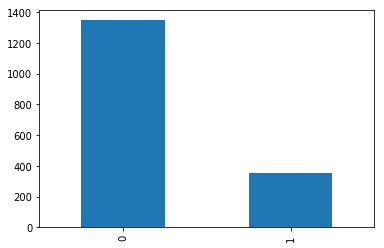

In [18]:
df_class_0 = data[data['spam'] == 0]
df_class_1 = data[data['spam'] == 1]
count_class_0, count_class_1 = data.spam.value_counts()
df_test = pd.concat([df_class_0, df_class_1], axis=0)

df_test.spam.value_counts().plot(kind='bar')
plt.show()


Following is for oversampling

1    1347
0    1347
Name: spam, dtype: int64


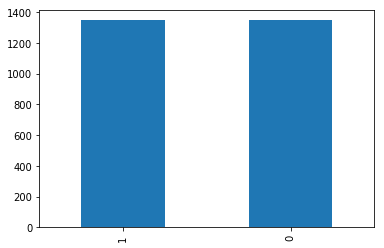

In [19]:
# Oversample
df_class_0 = data[data['spam'] == 0]
df_class_1 = data[data['spam'] == 1]
count_class_0, count_class_1 = data.spam.value_counts()

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
print('\nFollowing is for oversampling\n')
# print(df_class_1_over)
#
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(df_test_over.spam.value_counts())
df_test_over.spam.value_counts().plot(kind='bar')
plt.show()

In [20]:
data = df_test_over

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer() 

dtm_title = tfidf_vect.fit_transform(data["title"])

print("type of dtm_title:", type(dtm_title))
print("size of tfidf matrix:", dtm_title.shape)


dtm_content = tfidf_vect.fit_transform(data["content"])
dtm_conbine = tfidf_vect.fit_transform(data["combine"])

dtm_title.shape

type of dtm_title: <class 'scipy.sparse.csr.csr_matrix'>
size of tfidf matrix: (526, 1161)


(526, 1161)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

In [6]:
# TITLE
dtm_title = dtm_title.toarray()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dtm_title, data["spam"], test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 1161)
(106, 1161)
(420,)
(106,)


0.9203

LDA Classifier
0.7693

LR Classifier
0.9195443218227128
0.9195

SVM Classifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9217

NB Classifier
0.7642


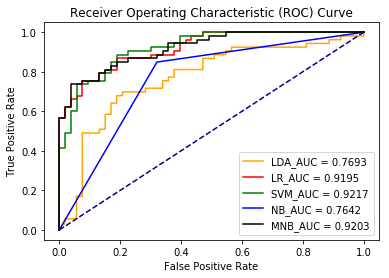

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.7735849056603774
0.899252402990388
0.8993


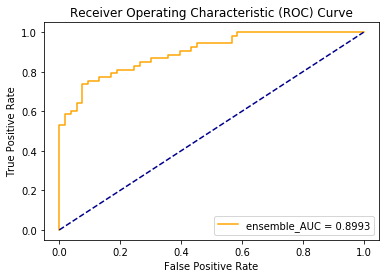

In [8]:
LDA = LinearDiscriminantAnalysis()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
MNB = MultinomialNB()

# MNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB_score = MNB.score(X_test, y_test)
# print(MNB_score)
MNB_probs = MNB.predict_proba(X_test)
MNB_probs = MNB_probs[:, 1]
# print(MNB_probs)
MNB_auc = roc_auc_score(y_test, MNB_probs)
MNB_auc = round(MNB_auc, 4)
print(MNB_auc)

MNB_fpr, MNB_tpr, thresholds = roc_curve(y_test, MNB_probs, pos_label=1)


# LDA
print('\nLDA Classifier')
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_train, y_train)
LDA_score = LDA.score(X_test, y_test)
# print(LDA_score)
LDA_probs = LDA.predict_proba(X_test)
LDA_probs = LDA_probs[:, 1]
LDA_auc = roc_auc_score(y_test, LDA_probs)
LDA_auc = round(LDA_auc, 4)
print(LDA_auc)

LDA_fpr, LDA_tpr, thresholds = roc_curve(y_test, LDA_probs, pos_label=1)

# LR
print('\nLR Classifier')
LR = LogisticRegression(solver='lbfgs', max_iter=5000)
LR = LR.fit(X_train, y_train)
LR_score = LR.score(X_test, y_test)
# print(LR_score)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
# print(probs)
LR_auc = roc_auc_score(y_test, LR_probs)
print(LR_auc)
LR_auc = round(LR_auc, 4)
print(LR_auc)

LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR_probs, pos_label=1)


# SVM
print('\nSVM Classifier')
SVM = svm.SVC(kernel='linear', probability=True)
SVM = SVM.fit(X_train, y_train)
SVM_score = SVM.score(X_test, y_test)
# print(SVM_score)
SVM_probs = SVM.predict_proba(X_test)
SVM_probs = SVM_probs[:, 1]
# print(SVM_probs)
SVM_auc = roc_auc_score(y_test, SVM_probs)
SVM_auc = round(SVM_auc, 4)
print(SVM_auc)

SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM_probs, pos_label=1)


# NB
print('\nNB Classifier')
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB_score = NB.score(X_test, y_test)
# print(NB_score)
NB_probs = NB.predict_proba(X_test)
NB_probs = NB_probs[:, 1]
# print(NB_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
NB_auc = round(NB_auc, 4)
print(NB_auc)

NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_probs, pos_label=1)

# models plot
plt.plot(LDA_fpr, LDA_tpr, color='orange', label='LDA_AUC = {}'.format(LDA_auc))
plt.plot(LR_fpr, LR_tpr, color='red', label='LR_AUC = {}'.format(LR_auc))
plt.plot(SVM_fpr, SVM_tpr, color='green', label='SVM_AUC = {}'.format(SVM_auc))
plt.plot(NB_fpr, NB_tpr, color='blue', label='NB_AUC = {}'.format(NB_auc))
plt.plot(MNB_fpr, MNB_tpr, color='black', label='MNB_AUC = {}'.format(MNB_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Ensemble
print('\n\n')
estimator = [('NB', NB), ('LR', LR), ('LDA', LDA), ('SVM', SVM), ('MNB', MNB)]
ensemble = VotingClassifier(estimator, voting='soft')
ensemble = ensemble.fit(X_train, y_train)
ensemble_score = ensemble.score(X_test, y_test)
print(ensemble_score)
ensemble_probs = ensemble.predict_proba(X_test)
ensemble_probs = ensemble_probs[:, 1]
# print(NB_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)
print(ensemble_auc)
ensemble_auc = round(ensemble_auc, 4)
print(ensemble_auc)

ensemble_fpr, ensemble_tpr, thresholds = roc_curve(y_test, ensemble_probs, pos_label=1)

# ensemble model plot
plt.plot(ensemble_fpr, ensemble_tpr, color='orange', label='ensemble_AUC = {}'.format(ensemble_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


0.9623

LDA Classifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.5754

LR Classifier
0.9642628205128205
0.9643

SVM Classifier
0.9556

NB Classifier
0.8045


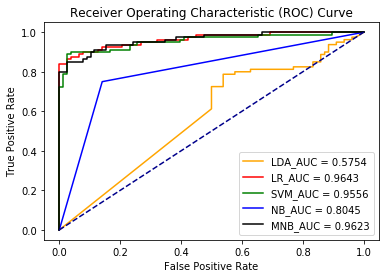

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.879746835443038


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.933974358974359
0.934


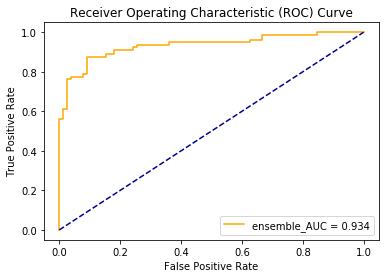

In [9]:
# CONTENT
dtm_content = tfidf_vect.fit_transform(data["content"])
dtm_content = dtm_content.toarray()
X_train, X_test, y_train, y_test = train_test_split(dtm_content, data["spam"], test_size=0.3, random_state=0)
LDA = LinearDiscriminantAnalysis()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
MNB = MultinomialNB()

# MNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB_score = MNB.score(X_test, y_test)
# print(MNB_score)
MNB_probs = MNB.predict_proba(X_test)
MNB_probs = MNB_probs[:, 1]
# print(MNB_probs)
MNB_auc = roc_auc_score(y_test, MNB_probs)
MNB_auc = round(MNB_auc, 4)
print(MNB_auc)

MNB_fpr, MNB_tpr, thresholds = roc_curve(y_test, MNB_probs, pos_label=1)


# LDA
print('\nLDA Classifier')
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_train, y_train)
LDA_score = LDA.score(X_test, y_test)
# print(LDA_score)
LDA_probs = LDA.predict_proba(X_test)
LDA_probs = LDA_probs[:, 1]
LDA_auc = roc_auc_score(y_test, LDA_probs)
LDA_auc = round(LDA_auc, 4)
print(LDA_auc)

LDA_fpr, LDA_tpr, thresholds = roc_curve(y_test, LDA_probs, pos_label=1)

# LR
print('\nLR Classifier')
LR = LogisticRegression(solver='lbfgs', max_iter=5000)
LR = LR.fit(X_train, y_train)
LR_score = LR.score(X_test, y_test)
# print(LR_score)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
# print(probs)
LR_auc = roc_auc_score(y_test, LR_probs)
print(LR_auc)
LR_auc = round(LR_auc, 4)
print(LR_auc)

LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR_probs, pos_label=1)


# SVM
print('\nSVM Classifier')
SVM = svm.SVC(kernel='linear', probability=True)
SVM = SVM.fit(X_train, y_train)
SVM_score = SVM.score(X_test, y_test)
# print(SVM_score)
SVM_probs = SVM.predict_proba(X_test)
SVM_probs = SVM_probs[:, 1]
# print(SVM_probs)
SVM_auc = roc_auc_score(y_test, SVM_probs)
SVM_auc = round(SVM_auc, 4)
print(SVM_auc)

SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM_probs, pos_label=1)


# NB
print('\nNB Classifier')
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB_score = NB.score(X_test, y_test)
# print(NB_score)
NB_probs = NB.predict_proba(X_test)
NB_probs = NB_probs[:, 1]
# print(NB_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
NB_auc = round(NB_auc, 4)
print(NB_auc)

NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_probs, pos_label=1)

# models plot
plt.plot(LDA_fpr, LDA_tpr, color='orange', label='LDA_AUC = {}'.format(LDA_auc))
plt.plot(LR_fpr, LR_tpr, color='red', label='LR_AUC = {}'.format(LR_auc))
plt.plot(SVM_fpr, SVM_tpr, color='green', label='SVM_AUC = {}'.format(SVM_auc))
plt.plot(NB_fpr, NB_tpr, color='blue', label='NB_AUC = {}'.format(NB_auc))
plt.plot(MNB_fpr, MNB_tpr, color='black', label='MNB_AUC = {}'.format(MNB_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Ensemble
print('\n\n')
estimator = [('NB', NB), ('LR', LR), ('LDA', LDA), ('SVM', SVM), ('MNB', MNB)]
ensemble = VotingClassifier(estimator, voting='soft')
ensemble = ensemble.fit(X_train, y_train)
ensemble_score = ensemble.score(X_test, y_test)
print(ensemble_score)
ensemble_probs = ensemble.predict_proba(X_test)
ensemble_probs = ensemble_probs[:, 1]
# print(NB_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)
print(ensemble_auc)
ensemble_auc = round(ensemble_auc, 4)
print(ensemble_auc)

ensemble_fpr, ensemble_tpr, thresholds = roc_curve(y_test, ensemble_probs, pos_label=1)

# ensemble model plot
plt.plot(ensemble_fpr, ensemble_tpr, color='orange', label='ensemble_AUC = {}'.format(ensemble_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


0.9612

LDA Classifier


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.5848

LR Classifier
0.9621794871794873
0.9622

SVM Classifier
0.9532

NB Classifier
0.8107


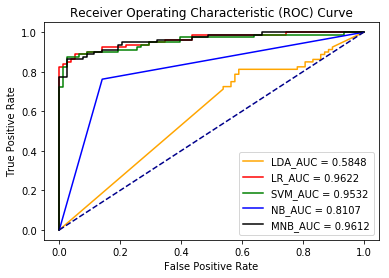

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.879746835443038


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:516: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.9333333333333333
0.9333


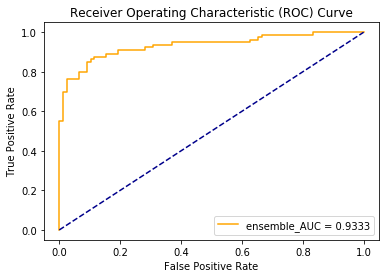

In [10]:
# CONBINE
dtm_conbine = tfidf_vect.fit_transform(data["combine"])
dtm_conbine = dtm_conbine.toarray()
X_train, X_test, y_train, y_test = train_test_split(dtm_conbine, data["spam"], test_size=0.3, random_state=0)
LDA = LinearDiscriminantAnalysis()
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
MNB = MultinomialNB()

# MNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB_score = MNB.score(X_test, y_test)
# print(MNB_score)
MNB_probs = MNB.predict_proba(X_test)
MNB_probs = MNB_probs[:, 1]
# print(MNB_probs)
MNB_auc = roc_auc_score(y_test, MNB_probs)
MNB_auc = round(MNB_auc, 4)
print(MNB_auc)

MNB_fpr, MNB_tpr, thresholds = roc_curve(y_test, MNB_probs, pos_label=1)


# LDA
print('\nLDA Classifier')
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_train, y_train)
LDA_score = LDA.score(X_test, y_test)
# print(LDA_score)
LDA_probs = LDA.predict_proba(X_test)
LDA_probs = LDA_probs[:, 1]
LDA_auc = roc_auc_score(y_test, LDA_probs)
LDA_auc = round(LDA_auc, 4)
print(LDA_auc)

LDA_fpr, LDA_tpr, thresholds = roc_curve(y_test, LDA_probs, pos_label=1)

# LR
print('\nLR Classifier')
LR = LogisticRegression(solver='lbfgs', max_iter=5000)
LR = LR.fit(X_train, y_train)
LR_score = LR.score(X_test, y_test)
# print(LR_score)
LR_probs = LR.predict_proba(X_test)
LR_probs = LR_probs[:, 1]
# print(probs)
LR_auc = roc_auc_score(y_test, LR_probs)
print(LR_auc)
LR_auc = round(LR_auc, 4)
print(LR_auc)

LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR_probs, pos_label=1)


# SVM
print('\nSVM Classifier')
SVM = svm.SVC(kernel='linear', probability=True)
SVM = SVM.fit(X_train, y_train)
SVM_score = SVM.score(X_test, y_test)
# print(SVM_score)
SVM_probs = SVM.predict_proba(X_test)
SVM_probs = SVM_probs[:, 1]
# print(SVM_probs)
SVM_auc = roc_auc_score(y_test, SVM_probs)
SVM_auc = round(SVM_auc, 4)
print(SVM_auc)

SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM_probs, pos_label=1)


# NB
print('\nNB Classifier')
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
NB_score = NB.score(X_test, y_test)
# print(NB_score)
NB_probs = NB.predict_proba(X_test)
NB_probs = NB_probs[:, 1]
# print(NB_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
NB_auc = round(NB_auc, 4)
print(NB_auc)

NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_probs, pos_label=1)

# models plot
plt.plot(LDA_fpr, LDA_tpr, color='orange', label='LDA_AUC = {}'.format(LDA_auc))
plt.plot(LR_fpr, LR_tpr, color='red', label='LR_AUC = {}'.format(LR_auc))
plt.plot(SVM_fpr, SVM_tpr, color='green', label='SVM_AUC = {}'.format(SVM_auc))
plt.plot(NB_fpr, NB_tpr, color='blue', label='NB_AUC = {}'.format(NB_auc))
plt.plot(MNB_fpr, MNB_tpr, color='black', label='MNB_AUC = {}'.format(MNB_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Ensemble
print('\n\n')
estimator = [('NB', NB), ('LR', LR), ('LDA', LDA), ('SVM', SVM), ('MNB', MNB)]
ensemble = VotingClassifier(estimator, voting='soft')
ensemble = ensemble.fit(X_train, y_train)
ensemble_score = ensemble.score(X_test, y_test)
print(ensemble_score)
ensemble_probs = ensemble.predict_proba(X_test)
ensemble_probs = ensemble_probs[:, 1]
# print(NB_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)
print(ensemble_auc)
ensemble_auc = round(ensemble_auc, 4)
print(ensemble_auc)

ensemble_fpr, ensemble_tpr, thresholds = roc_curve(y_test, ensemble_probs, pos_label=1)

# ensemble model plot
plt.plot(ensemble_fpr, ensemble_tpr, color='orange', label='ensemble_AUC = {}'.format(ensemble_auc))
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
